In [ ]:
Lets do a Principal Component Analysis (PCA) on some real data. We will use DAC feedback data for this purpose

In [1]:
# Importing the libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Importing data set
import pandas as pd
DAC_Feedback = pd.read_excel("E:\DSML Manipal ProLearn\PCA\DAC FEEDBACK REPORT.xlsx")

DAC_Feedback

,Sub. Code,Sub. Name,Faculty Name,DAC_FEEDBACK_COUNT,Pace of Delivery,Quality of Teaching,Clearing of Doubt,Encourage Questions,Ask Questions,Ask Challenging Questions,Helps weak Students,Subject Expertise,Action Taken
0,MA 1408,"NUMERICAL METHOD, COMPLEX AND FOURIER ANALYSIS",CRC,1,3.510000,3.460000,3.550000,3.280000,3.230000,3.010000,3.420000,3.750000,NaN
1,MA 1409,"NUMERICAL METHOD, COMPLEX AND FOURIER ANALYSIS",CRC,2,3.600000,3.350000,3.283333,3.250000,3.266667,3.016667,3.350000,3.700000,NaN
2,MA 1410,"NUMERICAL METHOD, COMPLEX AND FOURIER ANALYSIS",CRC,3,3.780000,3.520000,3.670000,3.450000,3.710000,3.320000,3.760000,3.890000,NaN
3,CS 1403,DATABASE MANAGEMENT SYSTEMS,SAB,1,3.860000,4.080000,3.840000,3.780000,3.820000,3.880000,3.920000,3.940000,NaN
4,CS 1404,DATABASE MANAGEMENT SYSTEMS,SAB,2,3.966102,3.762712,3.559322,3.830508,3.915254,3.576271,3.661017,3.542373,NaN
5,CS 1405,DATABASE MANAGEMENT SYSTEMS,SAB,3,3.870000,3.630000,3.460000,3.650000,3.600000,3.600000,3.630000,3.730000,NaN
6,CS 1405,DESIGN AND ANALYSIS OF ALGORITHMS,BU,1,3.650000,3.630000,3.800000,3.780000,3.480000,3.700000,3.700000,3.650000,NaN
7,CS 1406,DESIGN AND ANALYSIS OF ALGORITHMS,BU,2,3.000000,3.100000,3.116667,2.866667,2.933333,2.833333,3.150000,3.166667,NaN
8,CS 1407,DESIGN AND ANALYSIS OF ALGORITHMS,BU,3,3.460000,3.550000,3.280000,3.440000,3.510000,3.420000,3.680000,3.600000,NaN
9,CS 1406,ADVANCED COMPUTER ARCHITECHTURE,INJ,1,3.920000,4.120000,4.120000,4.240000,4.120000,4.140000,4.170000,4.260000,NaN


In [26]:
# Faculty Name is our target variable and remaining are our input variables. Lets split them as Y and X

X = DAC_Feedback[['Pace of Delivery', 'Quality of Teaching', 'Clearing of Doubt', 'Encourage Questions',
                 'Ask Questions', 'Ask Challenging Questions', 'Helps weak Students', 'Subject Expertise']]

Y = DAC_Feedback[['Faculty Name']]

print('Dimension of X: ', X.shape)
print('Dimension of Y: ', Y.shape)

Dimension of X:  (60, 8)
Dimension of Y:  (60, 1)


In [ ]:
We will see how to calculate the PCs for Input variable
Step 1: PCA give better result by standardizing the data. This can be done either using corelation matrix or scaling.
NOTE: Scaling or Standardization is the process of normalise the data within a particular range. A Scaled or Standardized data will have a mean of 0 and SD of 1. Standardized data also helps in speeding up the calculations in an algorithm.

In [27]:
# Step 1: Scaling the data

# Creating the scaling object 

sc = StandardScaler()

# Fitting the object on our data

X_scaled = sc.fit_transform(X)

X_scaled

array([[-0.48085656, -0.44271789, -0.26643691, -0.74981784, -0.88942277,
        -0.9579658 , -0.51391789, -0.19672247],
       [-0.26979736, -0.64358866, -0.75014365, -0.80318006, -0.81945779,
        -0.94644639, -0.64333446, -0.28255612],
       [ 0.15232104, -0.33315202, -0.04876888, -0.44743192,  0.02648248,
        -0.42231344,  0.11467689,  0.04361176],
       [ 0.33992922,  0.68946276,  0.25959417,  0.13955251,  0.23637743,
         0.54531662,  0.4104862 ,  0.12944542],
       [ 0.58874855,  0.11006359, -0.24952767,  0.22939399,  0.41813546,
         0.02050032, -0.06832378, -0.55315036],
       [ 0.36338025, -0.13228126, -0.42968793, -0.09168378, -0.18341248,
         0.06150159, -0.12566817, -0.23105593],
       [-0.15254225, -0.13228126,  0.18703816,  0.13955251, -0.41238879,
         0.23429267,  0.0037484 , -0.36838978],
       [-1.67685871, -1.10011312, -1.05246036, -1.48503066, -1.4555031 ,
        -1.26323005, -1.0130961 , -1.1981151 ],
       [-0.59811168, -0.27836909

In [28]:
X_scaled.shape

(60, 8)

In [29]:
# Step 2: Creating the principal components

# Creating a PCA object with n_components defining how many PCS we want

pca = PCA(n_components=8)

# Fitting the PC object on our scaled data

pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.components_
# These values are created based on the eigen values and eigen vectors concept.

array([[-0.34447034, -0.35627066, -0.36088092, -0.35898938, -0.36050089,
        -0.35198379, -0.34924513, -0.34565495],
       [ 0.51092251,  0.29374729,  0.00401525, -0.30976196, -0.23612318,
        -0.40875757, -0.31381803,  0.48516333],
       [-0.58013655, -0.05457916,  0.1571505 , -0.06732605, -0.04732259,
        -0.38422064,  0.43923684,  0.53706581],
       [-0.39389379,  0.01633621, -0.07777129,  0.11184412,  0.16870238,
         0.38403787, -0.66913749,  0.44981415],
       [ 0.33233821, -0.7152812 , -0.35468443, -0.14058607,  0.25626443,
         0.13047658,  0.17578544,  0.34461937],
       [-0.11518774,  0.45267812, -0.52290517, -0.49299089, -0.06220325,
         0.40646348,  0.3066339 ,  0.04731076],
       [-0.00681086,  0.24112516, -0.63813563,  0.51836126,  0.3018696 ,
        -0.41800427,  0.0028999 , -0.0059632 ],
       [ 0.0694575 , -0.09408487, -0.18043347,  0.47605608, -0.78925222,
         0.23864159,  0.11806277,  0.18256606]])

In [ ]:
PC1 = -0.34447034*Pace of Delivery + 0.51092251*Quality of Teaching + -0.58013655*Clearing of Doubt + -0.39389379*Encourage Questions + 
0.33233821*Ask Questions + -0.11518774*Ask Challenging Questions + -0.00681086*Helps weak Students + 0.0694575*Subject Expertise'
PC2
PC3
PC4
PC5
PC6
PC7
PC8

In [32]:
# Step 3: We will ckeck the amount of variance that each PC explains

var= pca.explained_variance_ratio_

var

array([0.93214887, 0.02439998, 0.01597252, 0.01167706, 0.00701941,
       0.00364722, 0.00290554, 0.00222941])

In [33]:
# We can also calculate Cumulative Variance explains by PCs
import numpy as np
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

var1

array([93.21, 95.65, 97.25, 98.42, 99.12, 99.48, 99.77, 99.99])

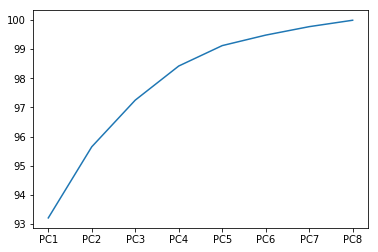

In [34]:
# Ploting the Cumulative using scree plot

X_axis = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

Y_axis = var1

plt.plot(X_axis, Y_axis)